In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()
v = [1., 2., 3., 4.]

#평균값, 제곱 구하기
print(tf.reduce_mean(v))#2.5
print(tf.square(3))#9

tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(9, shape=(), dtype=int32)


Instructions for updating:
Colocations handled automatically by placer.
2.0, 0.5
[ 2.5  4.5  6.5  8.5 10.5]


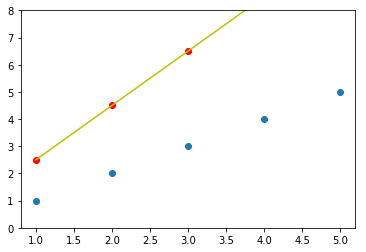

In [2]:
# Hypothesis, H(x) = Wx + b
# Cost = (Wx - y)**2
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b
print('{0}, {1}'.format(W.numpy(), b.numpy()))
print('{0}'.format(hypothesis.numpy()))

plt.plot(x_data, hypothesis.numpy(), 'ro')#hypothesis 그래프 출력, red, 점
plt.plot(x_data, hypothesis.numpy(), 'y-')#hypothesis 그래프 출력, yellow, line
plt.plot(x_data, y_data, 'o')#(x_data,y_data)를 출력
plt.ylim(0, 8)
plt.show()

W_grad: 25.0, b_grad: 7.0


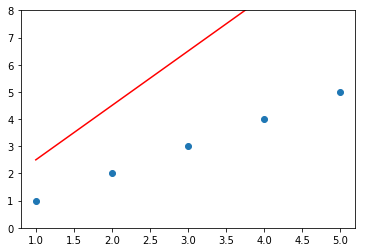

In [3]:
# cost
# hypothesis - y_data 의 제곱의 평균값을 구한다.
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

# Gradient
'''
 - tf.GradientTape  
    (아래 코드 참고)
    with 구문안의 블록안의 변수들의 정보를 tape에 기록하고  
    tape에 기록된 변수들의 정보(w,b)를 이후에 tape.gradient()함수를 통해 경사도를 구한다.  
    tape.gradient()함수는 cost함수에 대해 변수들(w,b)에 대한 개별 미분값(기울기)을 구해서 tuple을 반환한다.  
    learning rate값은 W_grad, b_grad 값을 얼만큼 반영할 것인지를 결정한다.  
    아래의 코드가 한 걸음이라고 보면 됨, W와 b가 한번 업데이트 된 것이다.  
'''
# tape에 변수들을 기록한다(hypothesis, cost, W, b, ...)
with tf.GradientTape() as tape:
  hypothesis = W * x_data + b
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))# hypothesis - y_data 의 제곱의 평균값을 구한다.

# tape.gradient()는 cost함수에 대해 변수들(w, b)에 대한 개별 미분값(기울기)을 구해서 tuple을 반환한다.
W_grad, b_grad = tape.gradient(cost, [W, b])
print('W_grad: {0}, b_grad: {1}'.format(W_grad.numpy(), b_grad.numpy()))

plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

W:1.75, b:0.4300000071525574


(0, 8)

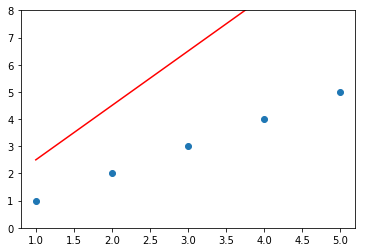

In [4]:
# update W, b parameter once
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

print('W:{0}, b:{1}'.format(W.numpy(), b.numpy()))

plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059


(0, 8)

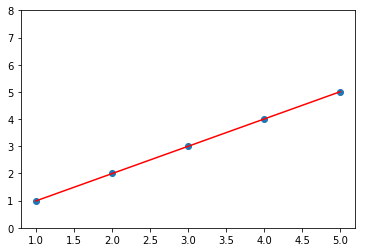

In [5]:
# update parameter, repeat 100 times
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
  # tape에 변수들을 기록한다(hypothesis, cost, W, b, ...)
  with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))# hypothesis - y_data 의 제곱의 평균값을 구한다.
  
  # tape.gradient()는 cost함수에 대해 변수들(W, b)에 대한 개별 미분값(기울기)을 구해서 tuple을 반환한다.
  W_grad, b_grad = tape.gradient(cost, [W, b])
  W.assign_sub(learning_rate * W_grad)#update W: W - learning_rate * W_grad
  b.assign_sub(learning_rate * b_grad)#update b: b - learning_rate * b_grad
  if i %10 == 0:
    print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

In [6]:
# predict
print('W: {0}, b: {1}'.format(W, b))
print('W*5+b: {0}, W*2.5 +b: {1}'.format(W * 5 + b, W * 2.5 + b))

# 전체 코드
import tensorflow as tf
import numpy as np
tf.enable_eager_execution()

# Data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# W, b update
for i in range(100):
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

print()

# predict
print(W * 5 + b)
print(W * 2.5 + b)

W: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0048164>, b: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.017388742>
W*5+b: 5.006693363189697, W*2.5 +b: 2.494652271270752
    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)
